In [1]:
"""
Created on Mon Jan  2 01:45:26 2023
@author: Mayur Ingole
Version : 01
"""

'\nCreated on Mon Jan  2 01:45:26 2023\n@author: Mayur Ingole\nVersion : 01\n'

### Model Building

In [2]:
#importing required librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading dataset
df = pd.read_csv(r"C:\Users\myrin\Documents\ds_salary_proj\salary_data_cleaned_afterEDA.csv")

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,spark,aws,asure,Excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,1,1,data scientist,na,2728,3


In [5]:
## work to do >>
## 1. choose relevent columns 
## 2. get dummy data for required columns
## 3. train test split
## 4. multiple linear regression
## 5. lasso regression
## 6. random forest
## 7. Tune model by using GridserchCV
## 8. Test ensembels

###  1. choose relevent columns 

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'Job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'asure', 'Excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [7]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'Job_state','same_state','age','python_yn','spark','aws','Excel','job_simp','seniority','desc_len']]
#not choosing R_yn only tow jobs required it and not giving any information

In [8]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provided,Job_state,same_state,age,python_yn,spark,aws,Excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,25,1,0,0,1,data scientist,na,2728


###  2. get dummy data 

In [9]:
## 2. get dummy data 
df_dum = pd.get_dummies(df_model)

In [10]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,50,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,39,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,13,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,58,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,25,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### 3.Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
# sepratimg input output variables
#input
X = df_dum.drop("avg_salary",axis = 1) # everything excepy avarage salary
#output
y = df_dum.avg_salary.values # values stored in form of array
# train test split 80 % train data 20% test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

### 4. Multiple Linear Regression 

In [12]:
import statsmodels.api as sm

In [13]:
# creating constant
# The constant term in regression analysis is the value at which the regression line crosses the y-axis. 
# The constant is also known as the y-intercept
X_sm = X = sm.add_constant(X)
# OLS >> Ordinary least squares
model = sm.OLS(y,X_sm)
model.fit().summary()
#  R sqr is preety good >> 0.708

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.48e-94
Time:                        18:11:48   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6012      6.720      6.488      0.000      30.404      56.799
Rating                                                3.6051      1.937      1.861      0.063      -0.200       7.410
num_comp                                              2.2511      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5821      9.173     -3.988      0.000     -54.597     -18.567
employer_provided                                    31.3641     11.524      2.722      0.007       8.731      53.997
same_state                                            2.4813      2.619      0.948      0.344      -2.661       7.624
age                                                   0.0348      0.030      1.160      0.246      -0.024       0.094
python_yn                                             8.1363      2.523      3.224      0.001       3.180      13.092
spark                                                -0.5715      2.921     -0.196      0.845      -6.307       5.164
aws                                                   1.1228      2.736      0.410      0.682      -4.250       6.496
Excel                                                -0.4020      2.268     -0.177      0.859      -4.855       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6196      8.629      1.578      0.115      -3.328      30.567
Size_1 to 50 employees                                1.1087      6.501      0.171      0.865     -11.659      13.876
Size_10000+ employees                                -2.9049      5.801     -0.501      0.617     -14.297       8.487
Size_1001 to 5000 employees                           6.1218      3.880      1.578      0.115      -1.498      13.741
Size_201 to 500 employees                             2.2418      3.873      0.579      0.563      -5.364       9.848
Size_5001 to 10000 employees                         -3.8783      5.443     -0.713      0.476     -14.568       6.811
Size_501 to 1000 employees                            2.1611      4.059      0.532      0.595      -5.811      10.133
Size_51 to 200 employees                              4.1816      4.422      0.946      0.345      -4.502      12.865
Size_Unknown                                         20.9498     13.993      1.497      0.135      -6.532      48.432
Type of ownership_-1                                 13.6196      8.629      1.578      0.115      -3.328      30.567
Type of ownership_College / University                6.4736     17.737      0.365      0.715     -28.360      41.307
Type of ownersh

In [14]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score
# cross validation is just multiple train test split in easy words
# it pull sample of data and validation set and it run the model on sample data and evaluate on 
# validation set that's held out it see if it genrilized  okay

In [16]:
np.mean(cross_val_score(lm,X_train,y_train , scoring = "neg_mean_absolute_error" , cv = 3))

-20.77023361366773

### 5. Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
lm_l = Lasso() #alpha=1.0
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = "neg_mean_absolute_error" , cv = 3))

-21.09619170492145

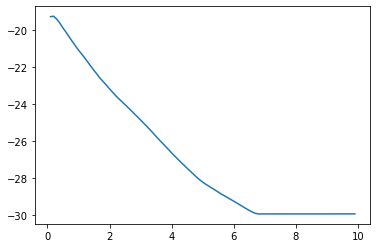

In [31]:
# lets try some values of alpha to see which one perform the best
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/10)
    lm_l = Lasso(alpha=(i/10)) #0.1 to 10
    error.append(np.mean(cross_val_score(lm_l , X_train,y_train, scoring = "neg_mean_absolute_error", cv =3 )))
    
plt.plot(alpha,error)

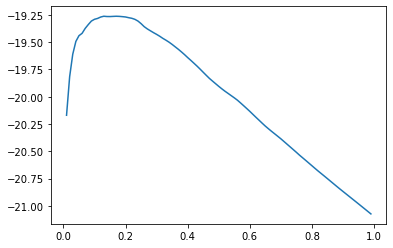

In [33]:
#trying from   alpha 0.01 to 1

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = "neg_mean_absolute_error", cv = 3)))

plt.plot(alpha,error)


In [50]:
#finding alpha for list error 
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err , columns = ["aplha" , "error"] )
df_err[df_err.error == max(df_err.error)]

,aplha,error
12,0.13,-19.262516


In [55]:
# alpha of 0.13 is givig best error term
#lasso regression by taking alpha 0.13
lm_l = Lasso(alpha = 0.13) 
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l , X_train, y_train , scoring = "neg_mean_absolute_error" , cv = 3))

-19.26251583392883

### 6. Random forest

In [61]:
#importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf ,X_train ,y_train , scoring = "neg_mean_absolute_error" , cv= 3))

-14.991850356355434

### 7. Tune model  GridSerchCV

In [84]:
# what GridSerchCV do >>
# we give parimeters to GridSerchCV it run allthe models and split's out the model with best result
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 
            'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [85]:
gs.best_score_

-14.838725986600352

In [86]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', n_estimators=160)

### 8. Test ensembels

In [88]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [92]:
from sklearn.metrics import mean_absolute_error

In [97]:
mean_absolute_error(y_test ,tpred_lm)

3919437.2410207116

In [98]:
mean_absolute_error(y_test ,tpred_lml)

19.66540217867269

In [99]:
mean_absolute_error(y_test ,tpred_rf)

11.120102768456377

### pickle model

In [100]:
import pickle
pickl = {"model" : gs.best_estimator_}
pickle.dump(pickl , open("model_file" + ".p" , "wb"))

In [101]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

### Prediction Test

In [103]:
#predicting on 18 th row
model.predict(np.array(list(X_test.iloc[18,:])).reshape(1,-1))[0]

C:\Users\myrin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


101.95

In [105]:
#list(X_test.iloc[1,:])